<div style="border:solid green 2px; padding: 20px">

<b>Привет, Никита!</b>

Меня зовут Ярослав П. и я буду проверять твой проект. Попробую помочь сделать тебе его еще лучше!

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span>

- Мне очень понравился твой проект, все лаконично и по делу.
- Ты пишешь отличные лаконичные функции. Также мне понравилась визуазация в проекте и подход к анализу.
- Только, пожалуйста, поработай над оформлением графиков.
- Также оставил комментарий про округления - они сделаны немного не там :)
- На шаге проверки гипотез я оставил один важный комментарий про `equal_var = False` и `equal_var = True`.
- Пожалуйста, дополни общий вывод - он как лицо всего проекта.
- По ходу работы я оставил комментарии по улучшению проекта. Надеюсь, они будут тебе полезны.
    
### <span style="color:orange">Обратная связь (v2)</span>

- Проект отлично доработан!
- Только оставил один комментарий про оформление графиков - посмотри, пожалуйста.
    
Проект принят, удачи в дальнейшем обучении!

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет!) Очень рад знакомству, большое спасибо за емкие комментарии в финальной части работы, подчерпнул для себя много нового, красные комментарии поправил все, все желтые изучил, переделаю их позже, когда буду повторно проходиться по материалу курса. </div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера (v2)</b>

Привет еще раз! Тебе спасибо за отклик :) Есть небольшой момент на счет графиков, но мне не хочется возвращать проект из-за такого :) Но, пожалуйста, учти этот момент в следующих проектах. Оформление графиков это важный критерий проверки всех проектов и проект могут вернуть на доработку лишь потому, что нет названий графиков. Ты подписал графики, но сделал это для оси х :) Я же скорее имел в виду title графика, который выводится над ним. Привел небольшой пример как это выглядит ниже.


>`sns.distplot(internet['mb_used'])
plt.title('Использование мегабайтов за сессию')
plt.xlabel('Мегабайты')
plt.ylabel('Частота')
plt.show()`


</div>


# Анализ тарифов
## Описание
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


<div class="alert alert-warning">
<b> Комментарий ревьюера </b>

Введение хорошее. Также перед началом основного блока исследования полезно описать данные, с которыми работаешь, 
какие шаги планируешь выполнить, четко сформулировать цель работы. Здесь также можно 
добавить кликабельное [оглавление](https://sebastianraschka.com/Articles/2014_ipython_internal_links.html) . Эту часть пользователь отчета видит самой первой и из нее становится понятно, чему работа посвящена.

</div>

## Шаг 1. Подготовка 
Импортируем необходимые библиотеки, получаем данные

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import scipy as st
from scipy import stats as st
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Раскладываем данные по датафреймам 
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

## Шаг 2. Первичный анализ полученных данных <a class="anchor" id="step2"></a>
Получаем общее представление о датафреймах, название колонок, типы данных, пропусках, распределениях параметров, аномальных значениях

### Звонки 

In [4]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


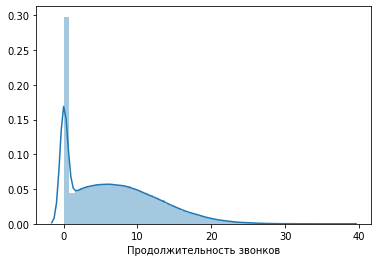

In [6]:
sns.distplot(calls['duration'], axlabel='Продолжительность звонков')

На графике виден отчетливый пик у 0, такое количество нулевых значений может сместить не только среднее, но даже медиану. Плюсом к этому - несостоявщиеся звонки скорее всего не оплачиваются. 

In [7]:
calls = calls.query('duration > 0')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Согласен с решением.

</div>


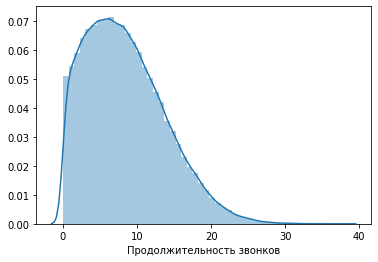

In [8]:
sns.distplot(calls['duration'], axlabel='Продолжительность звонков')

### Интернет 

In [9]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


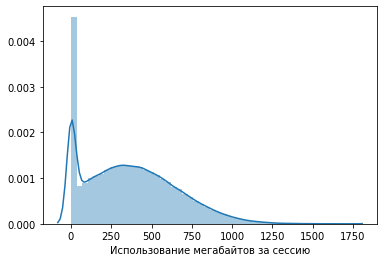

In [11]:
sns.distplot(internet['mb_used'], axlabel='Использование мегабайтов за сессию')

In [12]:
internet = internet.query('mb_used > 0')

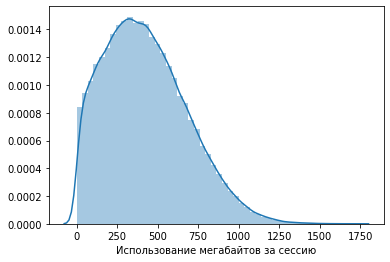

In [13]:
sns.distplot(internet['mb_used'], axlabel='Использование мегабайтов за сессию')

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера (v2)</b>

Только по поводу подписи графиков все-таки лучше использовать именно название (title), так как по оси х у нас мегабайты. В данной работе уже не нужно менять, но, пожалуйста, обрати на это внимание в будущих проектах.

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Нужно ли удалять нулевые сессии или они нам не помешают?

</div>


<div class="alert alert-info"> <b>Комментарий студента: </b>И правда, пропустил, их тоже можно смело убрать, денег такие сессии не принесут, а цель работы именно оценки прибыльности тарифов</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Отлично.

</div>


### Сообщения 

In [14]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Тарифы 

In [16]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Пользователи

In [17]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

На данном этапе мы познакомились с данным, с которыми предстоит работать, в них по большей части все в порядке, за исключением звонков с нулевой длительностью, которые мы сразу уже исключили из выборки.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Здесь стоит добавить краткий итог - все ли в порядке с данными, что сделали, какие ошибки.</s>

</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Дописал вывод</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


## Шаг 2. Изменяем типы, заполняем пропуски, удаляем аномалии

In [19]:
#Даты везде указаны строковым типом, для работы это не очень удобно, переведем их в date_time 

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')


In [20]:
#Именна и фамилии ничего нам не дают, но занимают место, их можно смело удалять. Нам так же не сильно нужны дата регистрации 

users = users.drop(columns=['first_name','last_name','age'])

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [22]:
calls['duration'] = calls['duration'].apply(np.ceil)

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Оператор округляет вверх также каждую интернет сессию. </s>

</div>


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Вообще, я советую работать с магабайтами. Так как таблица у нас в магабайтах, лимит дан тоже в них. А сумма за доп. гигабайт дана за гб, я думаю, чтобы не писать "15 и 20 копеек за мегабайт" - звучит несерьезно :)

</div>


<div class="alert alert-info"> <b>Комментарий студента:</b>Округлил сессии и звонки</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Теперь все верно.

</div>


In [23]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included'] / 1024
internet['gb_used'] = internet['mb_used']/1024

### Вывод

1. Везде, где необходимо, перевели даты из строкового типа в *date_time*
2. Удалены лишние столбцы из *user*
3. Мегабайты переведены в гигабайты, т.к. в тарифах указывают цену за гигабайт
4. Отсечены звонки с длительностью 0, так как они не могут быть тарифицированы.

## Шаг 3. Рассчитываем месячную активность пользователя

In [24]:
#Так как нам необходимо сравнивать помесячную выручку с каждого пользователя, то для удобства добавим столбцы с номерами месяцев
#для последующих группировок. 

def add_month_number(element):
    return element.month

In [25]:
calls['month'] = calls['call_date'].apply(add_month_number)
internet['month'] = internet['session_date'].apply(add_month_number)
messages['month'] = messages['message_date'].apply(add_month_number)

### Рассчитываем количество отправленных сообщений в месяц 

In [26]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'],  values = 'message_date', aggfunc='count')
messages_pivot.columns = ['message_amount']

### Рассчитываем время разговоров в месяц 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Согласно условиям оператора, он округляет каждый отдельно взятый звонок вверх. Добавь этот шаг перед группировками, пожалуйста.</s>

</div>


<div class="alert alert-info"> <b>Комментарий студента:</b>Округлил выше, вместе с использованными мегабайтами</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Вижу, отлично. Спасибо, что оставляешь комментарии по исправлениям.

</div>


In [27]:
calls_amount = calls.pivot_table(index=['user_id', 'month'], aggfunc='count')

In [28]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], aggfunc='sum')
calls_pivot.columns = ['calls_duration']

### Рассчитываем трафик пользователя в месяц

In [29]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values = 'gb_used', aggfunc='sum')

### Сводим данные в одну таблицу

In [30]:
final_pivot = internet_pivot.join(calls_pivot, how = 'left', on = ['user_id','month'])
final_pivot = final_pivot.join(messages_pivot, how = 'left', on = ['user_id','month'])

In [31]:
final_pivot = final_pivot.fillna(0)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Общая таблица получена верно!

</div>


### Рассчитываем выручку 

In [32]:
smart_users_ids = users.query('tariff == "smart" ')['user_id'].tolist()

In [33]:
def add_id(row):
    if row.name[0] in smart_users_ids:
        return('smart')
    else:
        return('ultra')

In [34]:
final_pivot['tariff'] = final_pivot.apply(add_id, axis=1)

In [35]:
final_pivot['gb_used'] = final_pivot['gb_used'].apply(np.ceil)
final_pivot['calls_duration'] = final_pivot['calls_duration'].apply(np.ceil)

In [36]:
final_pivot

gb_used  calls_duration  message_amount tariff
user_id month                                                
1000    5          3.0           159.0            22.0  ultra
        6         23.0           172.0            60.0  ultra
        7         14.0           340.0            75.0  ultra
        8         14.0           408.0            81.0  ultra
        9         15.0           466.0            57.0  ultra
...                ...             ...             ...    ...
1498    10        21.0           247.0            42.0  smart
1499    9          2.0            70.0            11.0  smart
        10        18.0           449.0            48.0  smart
        11        18.0           612.0            59.0  smart
        12        13.0           492.0            66.0  smart

[3201 rows x 4 columns]

In [37]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [38]:
def calculate_income(row):
    
    total_income = 0
    
    if row['tariff'] == 'smart':
        tariff_price = tariffs.loc[0]
    
    else:
        tariff_price = tariffs.loc[1]
        
    if row['gb_used'] > tariff_price['gb_per_month_included']:    
        total_income += int(row['gb_used'] - tariff_price['gb_per_month_included']) * tariff_price['rub_per_gb']
        
    else:
        total_income += 0
    
    if row['calls_duration'] > tariff_price['minutes_included']:
        total_income += int(row['calls_duration'] - tariff_price['minutes_included']) * tariff_price['rub_per_minute']
        
    else:
        total_income += 0
    
    if row['message_amount'] > tariff_price['messages_included']:
        total_income += int(row['message_amount'] - tariff_price['messages_included']) * tariff_price['rub_per_message']
        
    else:
         total_income += 0
    
    total_income += tariff_price['rub_monthly_fee']
        
    return total_income
         
        

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличная функция. Молодец, что сделал ссылки на таблицу с тарифами - верный подход.

</div>


In [39]:
final_pivot['total_income'] = final_pivot.apply(calculate_income, axis=1)
final_pivot

gb_used  calls_duration  message_amount tariff  total_income
user_id month                                                              
1000    5          3.0           159.0            22.0  ultra          1950
        6         23.0           172.0            60.0  ultra          1950
        7         14.0           340.0            75.0  ultra          1950
        8         14.0           408.0            81.0  ultra          1950
        9         15.0           466.0            57.0  ultra          1950
...                ...             ...             ...    ...           ...
1498    10        21.0           247.0            42.0  smart          1750
1499    9          2.0            70.0            11.0  smart           550
        10        18.0           449.0            48.0  smart          1150
        11        18.0           612.0            59.0  smart          1513
        12        13.0           492.0            66.0  smart           598

[3201 rows x 5 columns]

In [40]:
final_pivot = final_pivot.groupby('user_id').mean()
final_pivot

,gb_used,calls_duration,message_amount,total_income
user_id,,,,
1000,13.625000,320.750000,62.0,1950.000000
1001,16.500000,422.000000,0.0,950.000000
1002,16.714286,216.714286,10.0,1035.714286
1003,11.800000,764.400000,76.0,1950.000000
1004,18.750000,123.375000,149.0,1950.000000
...,...,...,...,...
1495,25.400000,784.000000,68.0,2310.000000
1496,22.583333,498.666667,39.0,2379.250000
1497,15.333333,468.666667,17.0,928.333333


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Вот это действие лишнее. При группировке по пользователю мы уже теряем часть данных (так как усредняем). Лучше оставить полную таблицу на 3200 значений и работать с ней. Тогда данных для графиков, для тестирования гипотез будет больше - а выводы точнее.

</div>


In [41]:
final_pivot = final_pivot.round(0)
final_pivot = final_pivot.reset_index()
final_pivot

,user_id,gb_used,calls_duration,message_amount,total_income
0,1000,14.0,321.0,62.0,1950.0
1,1001,16.0,422.0,0.0,950.0
2,1002,17.0,217.0,10.0,1036.0
3,1003,12.0,764.0,76.0,1950.0
4,1004,19.0,123.0,149.0,1950.0
...,...,...,...,...,...
492,1495,25.0,784.0,68.0,2310.0
493,1496,23.0,499.0,39.0,2379.0
494,1497,15.0,469.0,17.0,928.0
495,1498,19.0,323.0,42.0,1659.0


In [42]:
final_data = final_pivot.merge(users, on='user_id', how='left' )

### Вывод

1. Таблицы *calls*, *messages*, *internet* были сведены в одну, для этого была произведена группировка сначала по *user_id* потом по добавленному номеру месяцу, затем при помощи *join* объеденены в одну. По объедененной таблице посчитана помесячная выручка. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Данные готовы к анализу.

</div>


## Шаг 4. Исследуем параметры 

In [43]:
x_labels = {
    'gb_used':'Использованные гигабайты',
    'calls_duration':'Использованные минуты',
    'message_amount':'Использованные сообщения',
    'total_income':'Выручка',
}

In [44]:
def describe_params(df, params_list):
    for param in params_list:
        
        print('Имя параметра:' , param, '\n')
        
        print('Тариф Smart')
        describe = df.query('tariff == "smart"')[param].describe()
        
        print('Mean',describe['mean'])
        print('STD:', describe['std'])
        print('Var',df.query('tariff == "smart"')[param].var(),'\n')
        
        print('Тариф Ultra')
        describe = df.query('tariff == "ultra"')[param].describe()
        
        print('Mean',describe['mean'])
        print('STD:', describe['std'])
        print('Var',df.query('tariff == "ultra"')[param].var())
        
        plt.gcf().set_size_inches(16, 8)
        
        plt.subplot(1, 2, 1)
        sns.distplot(df.query('tariff == "smart"')[param], 
                     color='red', 
                     bins=8,
                     axlabel= f'{x_labels[param]} в тарифе smart',
                    )
        
        
        plt.subplot(1, 2, 2)
        sns.distplot(df.query('tariff == "ultra"')[param],
                     color='b', 
                     bins=8,
                     axlabel=f'{x_labels[param]} в тарифе ultra'
                    )
        
        plt.show()

Имя параметра: gb_used 

Тариф Smart
Mean 16.394285714285715
STD: 3.559397171936426
Var 12.669308227589028 

Тариф Ultra
Mean 19.775510204081634
STD: 7.9517344695057135
Var 63.230081073525305


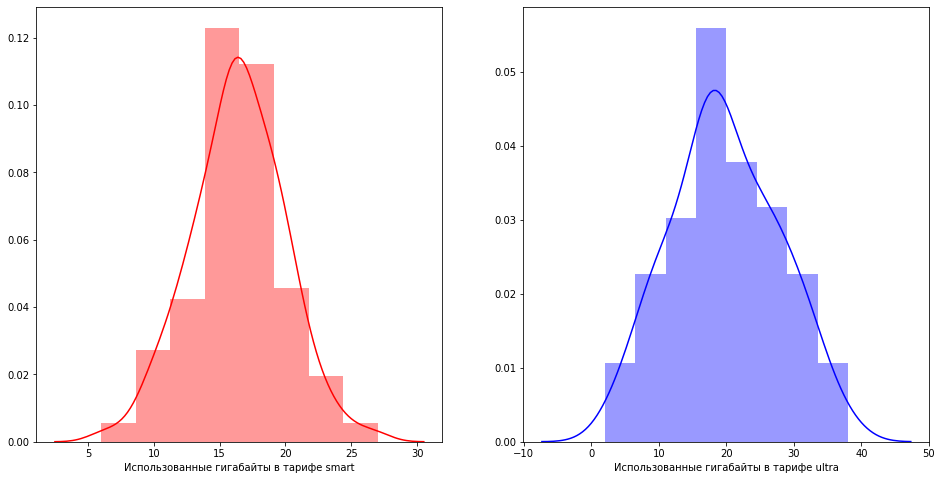

Имя параметра: calls_duration 

Тариф Smart
Mean 420.4971428571429
STD: 145.75364363763657
Var 21244.124633647156 

Тариф Ultra
Mean 531.265306122449
STD: 283.71351860178544
Var 80493.36063740564


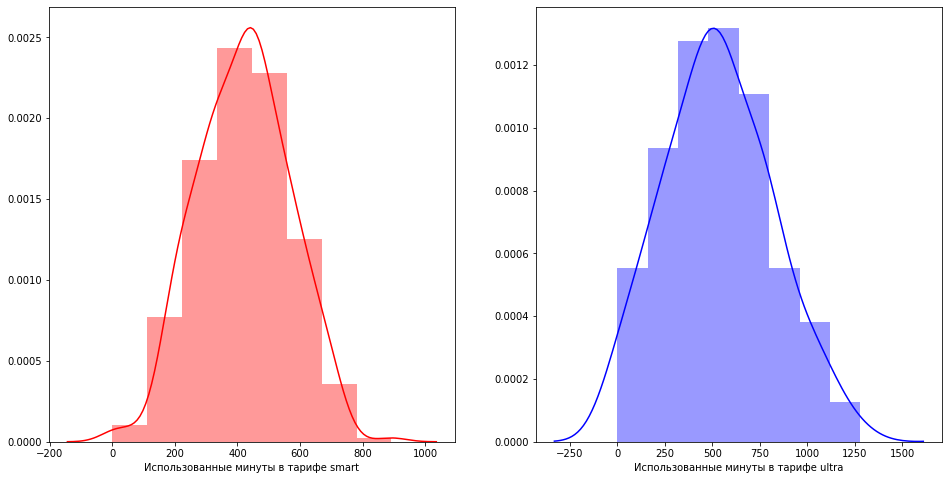

Имя параметра: message_amount 

Тариф Smart
Mean 32.41428571428571
STD: 26.518681773660795
Var 703.2404830126893 

Тариф Ultra
Mean 54.224489795918366
STD: 46.461914867214844
Var 2158.70953312832


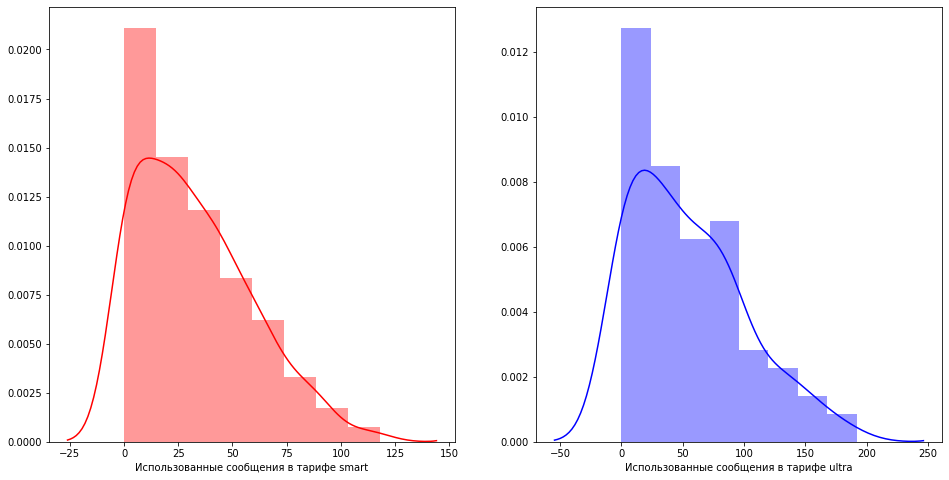

Имя параметра: total_income 

Тариф Smart
Mean 1332.88
STD: 614.7932793953466
Var 377970.7763896848 

Тариф Ultra
Mean 2088.3469387755104
STD: 301.63024295748613
Var 90980.80346659212


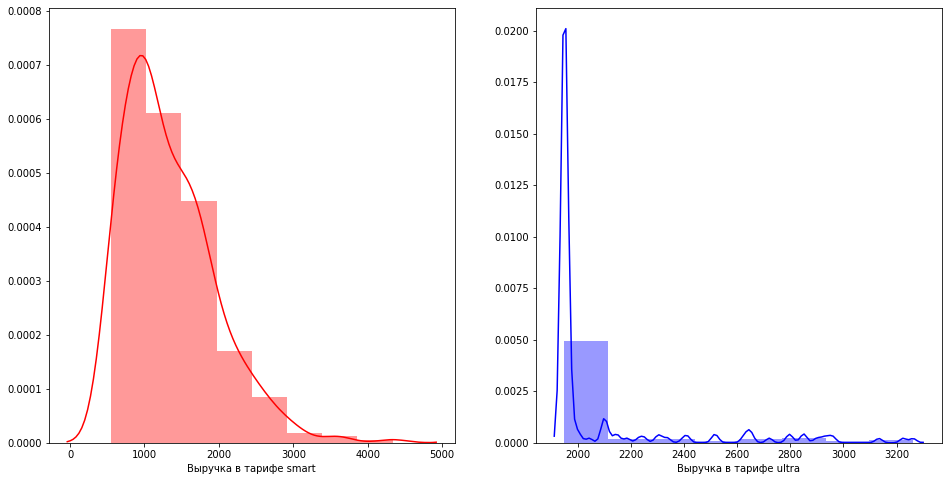

In [45]:
%matplotlib inline 
describe_params(final_data, ['gb_used', 'calls_duration', 'message_amount', 'total_income'])

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличная функция, верные статистические показатели и наглядные графики.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Разве что можно округлить значения стат. показателей - такой длинный десятичный "хвост" нам не сильно нужен. Также графики удобно было бы расместить рядом друг с другом.

</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

<s>Прошу тебя подписать графики и оси (эти и те, что были выше). Желательно, по-русски. А то непонятно, какой график к какому тарифу относится. Оформление графиков - важный критерий проверки проектов.</s>

</div>


<div class="alert alert-info"> <b>Комментарий студента: </b>Графики подписал, с тем, чтобы сделать полностью русские названия пришлось прикрутить словарь, но теперь выглядят правильными.</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Возможно, здесь было бы удобно реализовать функцию. Но и так все хорошо.

</div>


### Вывод 

##### Параметр: gb_used 

Имеет нормальное распредление в обоих тарифах, в среднем, пользователи ультра используют на 3 гигабайта в месяц больше, чем пользователи смарта. Однако, среднеквадратичное отклонение и дисперсия в тарифе ультра выше, что говорит о большей вариативности случайной величины. 

##### Параметр: calls_duration 

Ситуация такая же, как и с использованными гигабайтами, в ультре говорят на 200 минут в месяц дольше, но случайная величина более вариативная, за счет большей дисперсии и std.



##### Параметр:  message_amount  

Параметр имеет распределение Пуассона, что выглядит довольно правдоподно, ведь в мире мессенджеров смски практически не отправляют, нет ничего обычного в пике у нуля. В среднем, пользователи тарифа ultra отправляют на 22 сообщения в месяц больше, чем пользователи smart

##### Параметр: total_income

Самый интересный параметр. Тариф смарт имеет распределение, близкое к нормальному, это значит, что большинство пользователей приносит оператору денег больше, чем помесячная стоимость тарифа. 

Тариф Smart<br>
Mean: 1291<br>
STD: 591<br>
Var 350450<br>

В тарифе ultra - распредление имеет пик около стоимости тарифа, это означает, что пользовати обычно не переплачивают оператору и укладываются в отведенные бесплатне лимиты. 

Тариф Ultra<br>
Mean 2087<br>
STD: 299<br>
Var 89609<br>

Ситуация с вариативностью для этого параметра отличается от представленных выше, std и дисперсия в данном случае выше у пользователей тарифа смарт.



<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Анализ отличный.

</div>


## Шаг 5. Проверка гипотез

Необходимо проверить предположение о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Для проверки лучше использовать следующие статистические гипотезы:

H0:Средние двух генеральных совокупностей равный между собой <br>
H1:Средние двух генеральный совокупностей не равный между собой 



In [46]:
sample_ultra = final_data.query('tariff == "ultra"')['total_income']

In [47]:
sample_smart = final_data.query('tariff == "smart"')['total_income']

In [48]:
alpha = 0.05

In [49]:
results = st.ttest_ind(sample_ultra, sample_smart)

In [50]:
results.pvalue

1.3336905799210092e-38

In [51]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


H0:Средние двух генеральных совокупностей равный между собой<br>
H1:Средние двух генеральный совокупностей не равный между собой

In [52]:
sample_moscow = final_data.query('city == "Москва"')['total_income']

In [53]:
sample_other = final_data.query('city != "Москва"')['total_income']

In [54]:
results = st.ttest_ind(sample_moscow, sample_other)

In [55]:
results.pvalue

0.3649572558528962

In [56]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Вывод

Для проверки гипотез о равенстве средних был использован критерий стюдента. На основании теста можно сделать выводы:<br>

Средняя выручка тарифов смарт и ультра различается<br>

Нет основания говорить, что выручка абонентов из Москвы и регионов отличается.



<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Гипотезы сформулированы грамотно, результаты тестов интерпретированы верно!

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b> 
    
Также здесь у меня есть небольшое замечание по поводу выбора `equal_var = False` или `equal_var = True`. Перед проведением проверки гипотез через T-критерий Стьюдента нужно сравнить дисперсии двух выборок отдельно, и если они различаются более чем на 5%, то считаем отличие значимым и выбираем `equal_var = False`. Это является важным критерием при проверке сборного проекта, но и в этой работе тоже стоит добавить этот шаг. Также прикладываю [ссылку](http://pytolearn.csd.auth.gr/d1-hyptest/12/ttest-indep.html) с интересным материалом по поводу проверки дисперсий и нормальности распределений (однако проверка нормальности выходит за рамки нашего курса, поэтому ее делать не нужно, это скорее для общего понимания требований к тесту) с кодом. По ссылке также есть информация, что выборки должны быть одной длины. Однако, полазив по сайтам и почитав теорию, я не нашел слов о такой необходимости. Везде есть только информация про нормальность и дисперсии.

По ссылке  используется [тест Левена](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) перед проведением Т-теста. В некоторых статистических пакетах ([ссылка](https://habr.com/ru/sandbox/30391/) в качестве подтверждения моих слов) при проведении т-теста автоматически проводится тест Левена и на его основе выбирается параметр `equal_var`. В нашем случае приходится такое проделывать руками. 

Также проводить тест Левена не обязательно, можно просто посмотреть на [дисперсии](https://numpy.org/doc/stable/reference/generated/numpy.var.html) выборок (обрати внимание на параметр `ddof`) и оценить их различие "руками" на калькуляторе, результат будет тот же самый :)
    
Кстати, хочу поделиться еще одной ссылкой. Это [т-тест из другой библиотеки](https://pingouin-stats.org/generated/pingouin.ttest.html) с автоматической проверкой дисперсий. Достаточно удобный инструмент.

PS На счет нормальности. Это довольно интересный момент. Во всей информации про тест Стьюдента нормальность распределения приводится как требование. Однако, нормальность должна соблюдаться при малом количестве наблюдений в каждой выборке (до 30-40). От 50 же значений нормальность для сравнения средних значений совокупностей не играет важной роли. Здесь вступает в силу центральная предельная теорема. По данной [ссылке](https://statanaliz.info/statistica/proverka-gipotez/raspredelenie-t-kriteriya-styudenta-dlya-proverki-gipotezy-i-rascheta-doveritelnogo-intervala-v-ms-excel/) есть интересная фраза "Таким образом, ненормальность распределения – это, конечно, нехорошо, но некритично."
</div>


### Итог
Данные были изучены, сгруппированы, выручка посчитана, распределения рассмотрены, гипотезы проверены)

Самое важное - ответить, какой тариф лучше. 

С одной стороны, пользователи регулярно переплачивают сверх овтеденных лимитов в тарифе smart, что увеличивиает прибыль с каждой минуты\сообщения\гигабайта. Однако средняя выручка тарифа ultra выше за счет большего ежемесячного платежа, при этом пользователи редко выходят за лимиты и оставляют много неспользованных ресурсов. 

Ответ:
Для пользователя лучше smart - даже с учетом переплат за дополнительные ресурсы, в среднем он потратит меньше денег, чем ежемесячный платеж тарифа ultra.

Ultra - выбор оператора) Пользователи используют выделенные ресурсы не до конца, при этом ежемсячный платеж ощутимо выше. ultra выгоднее для оператора. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Молодец, что четко дал ответ на поставленный вопрос.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Но все-же общий вывод - самая важная часть проекта. Стоит давать его чуть более развернуто. Можно добавить информацию по портрету пользователя каждого из тарифов, кто сколько использует, какая услуга чаще всего превышается, какая нет. Например, никто из пользователей ультра не превысил лимит в 3000 минут за месяц - можно дать рекомендацию снизить этот предел, к примеру, понизив немного плату. Также можно оставить рекомендацию - на какой из тарифов сделать упор в рекламной кампании на 2019 год. Кстати, можно посчитать общую выручку с тарифов за год - не повлияет ли результат на выводы?

</div>
